# 3. Paths

In [1]:
import drawsvg as dw

```
path = dw.Path(**kwargs)
```
The following Path specifiers are also availiable as lowercase characters. In
that case, their movements are relative to current location.

Note that in `drawsvg` it is not possible to have more than one element in a
command. But it is possible to add the commands directly, for instance

```python
p = dw.Path()
p.M(100,100).L(200,100).L(200,200).Z
```

## M = moveto
```
path.M(x,y)
```
Move to `x,y` (and draw nothing).

## L = lineto
```
path.L(x,y)
```

Draw a straigt line to `x,y`.

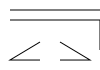

In [2]:
d = dw.Drawing(100,70,id_prefix='pathL')
g = dw.Group(stroke='black',fill='none')

p = dw.Path()
p.M(10,10).L(100,10)
g.append(p)

p = dw.Path()
p.M(10,20).L(100,20).L(100,50)
g.append(p)

p = dw.Path()
p.M(40,60).L(10,60).L(40,42)
p.M(60,60).L(90,60).L(60,42)
g.append(p)

d.append(g)
#d.save_svg('03_pL.svg')
d

## H = horizontal line
```
path.H(x)
```

Draw a horizontal line to the new `x` location.

## V = vertical line
```
path.V(x)
```

Draw a vertical line to the new `y` location.

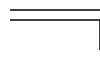

In [3]:
d = dw.Drawing(100,60,id_prefix='pathHV')
p = dw.Path(stroke='black',fill='none')
d.append(p.M(10,10).H(100))
d.append(p.M(10,20).H(100).V(50))
#d.save_svg('03_pHV.svg')
d

## Q = quadratic Bézier curve (one control point)

```
path.Q(x_ctl,y_ctl,x_end,y_end)
```

Draw a quadratic Bézier curve from current location to `x_end,y_end` by means
of `x_ctl,y_ctl`.


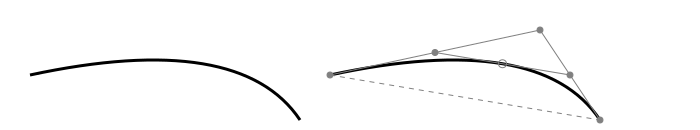

In [4]:
d = dw.Drawing(700,130,id_prefix='pathQ')
# curve only (left)
p = dw.Path(stroke='black',fill='none',stroke_width=3)
d.append(p.M(30,75).Q(240,30,300,120))
# with control point and construction lines
d.append(dw.Use(p,300,0))
g = dw.Group(stroke='gray',fill='gray')
g.append(dw.Circle(330,75,3))
g.append(dw.Circle(600,120,3))
g.append(dw.Circle(540,30,3))
g.append(dw.Line(330,75,540,30))
g.append(dw.Line(540,30,600,120))
g.append(dw.Line(330,75,600,120,stroke_dasharray='5,5'))
g.append(dw.Circle(435,52.5,3))
g.append(dw.Circle(570,75,3))
g.append(dw.Line(435,52.5,570,75))
g.append(dw.Circle(502.5,63.75,4,fill='none'))
d.append(g)
#d.save_svg('03_pQ.svg')
d

## T = smooth quadratic Bézier curve (generated control point)

```
path.T(x,y)
```

Draws a quadratic Bézier curve from the current point to (x,y). The control 
point is assumed to be the reflection of the control point on the previous 
command relative to the current point. (If there is no previous command or if 
the previous command was not a Q, q, T or t, assume the control point is 
coincident with the current point.) (From [W3C Doc](https://www.w3.org/TR/SVG11/paths.html#PathDataQuadraticBezierCommands))


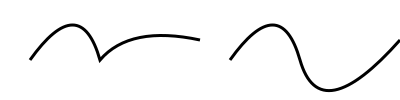

In [5]:
d = dw.Drawing(400,100,id_prefix='pathT')
# sequence left
p = dw.Path(stroke='black',fill='none',stroke_width=3)
d.append(p.M(30,60).Q(80,-10,100,60).Q(130,25,200,40))
# with smooth continuation right
p = dw.Path(stroke='black',fill='none',stroke_width=3,transform='translate(200,0)')
d.append(p.M(30,60).Q(80,-10,100,60).T(200,40))
#d.save_svg('03_pT.svg')
d

## C = cubic Bézier curve (two control points)

```
path.C(x_ctl_1,y_ctl_1,x_ctl_2,y_ctl_2,x_end,y_end)
```

Draw a cubic Bézier curve by means of two control points (one for start and
one for end).

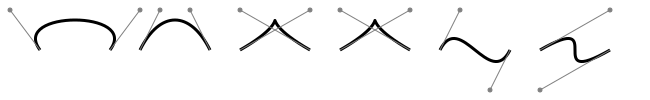

In [6]:
d = dw.Drawing(650,100,id_prefix='pathC')
pnt_1 = (40,50)
pnt_2 = (110,50)
ctl_1_x = (10,60,110,110,60,110)
ctls_2 = ((140,10),(90,10),(40,10),(40,10),(90,90),(40,90))

for i in range(6):
    trans = 'translate(%d,0)' % i*100
    p = dw.Path(stroke='black',fill='none',stroke_width=3,transform=trans)
    ctl_1 = (ctl_1_x[i],10)
    ctl_2 = ctls_2[i]
    p.M(*pnt_1)
    p.C(*ctl_1,*ctl_2,*pnt_2)
    d.append(p)
    g = dw.Group(stroke='gray',fill='gray',stroke_width=1,transform=trans)
    g.append(dw.Circle(*ctl_1,2))
    g.append(dw.Circle(*ctl_2,2))
    g.append(dw.Line(*pnt_1,*ctl_1))
    g.append(dw.Line(*pnt_2,*ctl_2))
    d.append(g)
#d.save_svg('03_pC.svg')
d

## S = smooth cubic Bézier (one control point)

Similar to `T` in quadratic Bézier curve. The first control point is calculated 
as reflection of the previous second control point.

```
path.S(x_ctl_2,y_ctl_2,x_end,y_end)
```

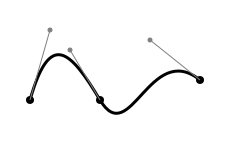

In [7]:
d = dw.Drawing(250,150,id_prefix='pathS')
pnt_1 = (30,100)
pnt_2 = (100,100)
pnt_3 = (200,80)
ctl_1 = (50,30)
ctl_2 = (70,50)
ctl_3 = (150,40)

p = dw.Path(stroke='black',fill='none',stroke_width=3)
p.M(*pnt_1)
p.C(*ctl_1,*ctl_2,*pnt_2)
p.S(*ctl_3,*pnt_3)
d.append(p)

for pnt,ctl in zip((pnt_1,pnt_2,pnt_3),(ctl_1,ctl_2,ctl_3)):
    d.append(dw.Circle(*pnt,4))
    d.append(dw.Circle(*ctl,2,stroke='gray',fill='gray'))
    d.append(dw.Line(*pnt,*ctl,stroke='gray'))
#d.save_svg('03_pS.svg')
d

## A = elliptical Arc

```
path.A(rx,ry,rot,largeArc,sweep,ex,ey)
	rx,ry = radius 
	rot = x-axis rotation
	largeArc = 1 or 0
	sweep = 1 (positive) or 0 (negative) angle
	ex,ey = end point
```

In [9]:
d = dw.Drawing(400,200,id_prefix='pathA',stroke_width=3,fill='none')
p = dw.Path(stroke='red')
d.append(p.M(125,75).A(100,50,rot=0,large_arc=0,sweep=0,ex=225,ey=125))
p = dw.Path(stroke='blue')
d.append(p.M(125,75).A(100,50,rot=0,large_arc=0,sweep=1,ex=225,ey=125))
p = dw.Path(stroke='rgb(0 80 255)',stroke_dasharray='5 3')
d.append(p.M(125,75).A(100,50,rot=0,large_arc=1,sweep=0,ex=225,ey=125))
p = dw.Path(stroke='rgb(255 80 0)',stroke_dasharray='5 3')
d.append(p.M(125,75).A(100,50,rot=0,large_arc=1,sweep=1,ex=225,ey=125))
#d.save_svg('03_pA.svg')
d

## Z = closepath  

```
path.Z()
```

Close the path.

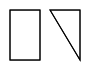

In [10]:
d = dw.Drawing(90,70,id_prefix='pathZ')
p = dw.Path(stroke='black',fill='none')
d.append(p.M(10,10).h(30).v(50).h(-30).Z())
d.append(p.M(50,10).h(30).v(50).Z())
#d.save_svg('03_pZ.svg')
d